In [15]:
!pip install torch torchvision matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 734.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.6 MB/s eta 0:00:00


Files already downloaded and verified
Files already downloaded and verified
Epoch [1/5], Loss: 0.0142
Epoch [2/5], Loss: 0.0134
Epoch [3/5], Loss: 0.0064
Epoch [4/5], Loss: 0.0046
Epoch [5/5], Loss: 0.0062


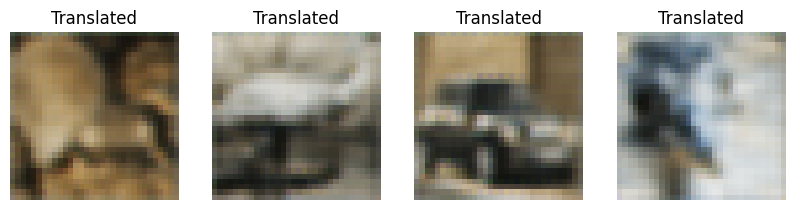

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Step 1: Define the Autoencoder Architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 3, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(3, 3, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Step 2: Prepare the Dataset
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

car_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
bird_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)

# Filter 'car' images
car_dataset = [(img, 1) for img, label in car_dataset if label == 1]
# Filter 'bird' images
bird_dataset = [(img, 2) for img, label in bird_dataset if label == 2]

# Combine car and bird datasets
train_dataset = car_dataset + bird_dataset

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Step 3: Initialize the Autoencoder Model and Optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
autoencoder = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Step 4: Train the Autoencoder
num_epochs = 5
for epoch in range(num_epochs):
    for img, label in train_loader:
        img = img.to(device)

        # Forward pass
        output = autoencoder(img)
        loss = criterion(output, img)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Step 5: Display translated images
with torch.no_grad():
    for img, label in train_loader:
        img = img.to(device)

        # Forward pass
        output = autoencoder(img)
        plt.figure(figsize=(10, 4))
        for i in range(4):
            plt.subplot(1, 4, i + 1)
            plt.imshow(output[i].permute(1, 2, 0).cpu().detach().numpy())
            plt.title('Translated')
            plt.axis('off')
        plt.show()
        break  # Break after displaying one set of images